In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "E:/RawData/Mike/2024_01_23_rollingbeads/"
vid = 'P1001955.mp4'
filepath = path + vid[:-4] + '.hdf5'

In [3]:
df = pd.read_hdf(filepath)
df.index.rename('index', inplace=True)
df.head()


,frame,x,y,area,contours
index,,,,,
0,0,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN


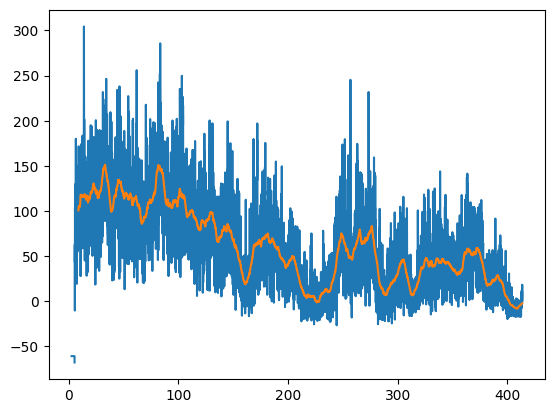

In [15]:
import numpy as np

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

mean_height = df.groupby('frame')['y'].mean().to_numpy()
mean_height = -(mean_height - mean_height[-1])
max_height = df.groupby('frame')['y'].min().to_numpy()
max_height = -(max_height - max_height[-1])
time = df.groupby('frame')['frame'].mean().to_numpy()/30
smoothed = smooth(mean_height, 201)
plt.plot(time, mean_height, label='mean height')
plt.plot(time, smoothed, label='smoothed mean height')

np.savetxt(path + vid[:-4] + '_mean_height.txt', np.c_[time, mean_height, smoothed], delimiter=',', header='time,mean_height,smoothed_mean_height', comments='')